# 2. Univariate Time Series; ARIMA, ARCH, dan GARCH

## 2.1 Model ARIMA

Menggunakan prosedur box-jenkins yang terdiri dari
1. Identifikasi
2. Estimasi Model
3. Evaluasi Model
4. Peramalan

In [9]:
library(readxl)
hargaberas <- read_excel("D:\\Repositori\\R-tutorial\\data - R IPB\\Bab 3\\ARIMA.xlsx")
hargaberas = hargaberas[,c(-1)]
hargaberas = ts(hargaberas, start = c(2012,1), frequency = 12)
hargaberas

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2012,8726,8778,8687,8583,8537,8554,8606,8635,8624,8624,8655,8702
2013,8835,8843,8783,8711,8681,8784,9018,9057,9058,9108,9152,9262
2014,9433,9531,9596,9425,9414,9462,9525,9525,9694,9781,9924,10344
2015,10612,10766,10987,10648,10569,10679,10732,10935,11055,11169,11365,11465
2016,11614,11729,11678,11449,11417,11469,11498,11475,11448,11433,11450,11476
2017,11579,11571,11494,11449,11465,11465,11448,11411,11482,11552,11665,11838
2018,12276,12414,12299,12035,11943,11907,11936,11899,11900,11926,12013,12106


### 2.1.1 Identifikasi

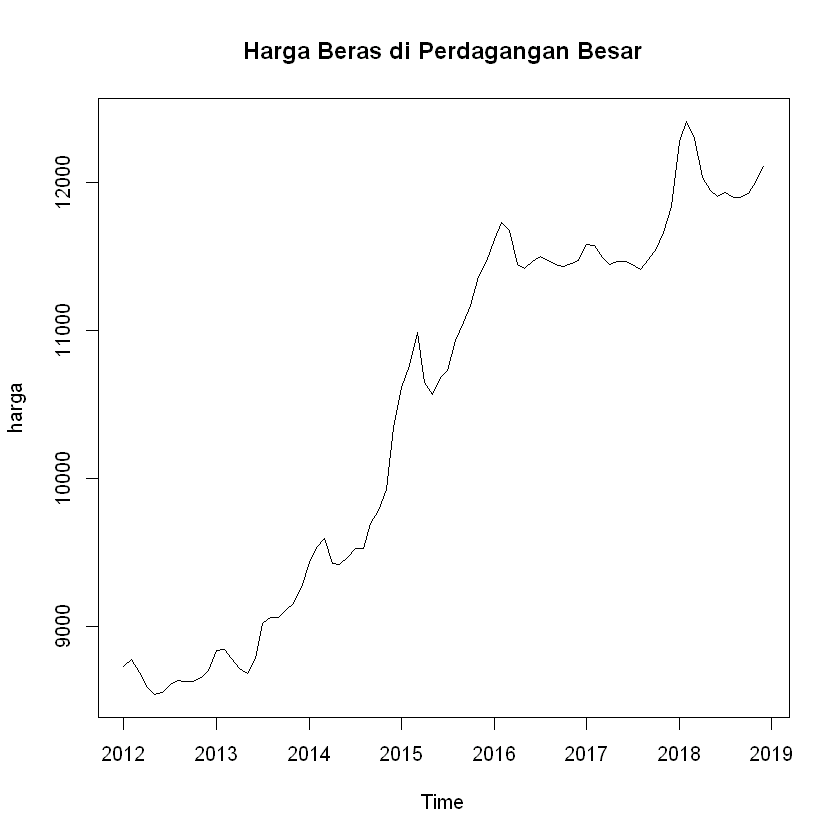

In [10]:
par(mfrow = c(1,1))
plot(hargaberas, main="Harga Beras di Perdagangan Besar")

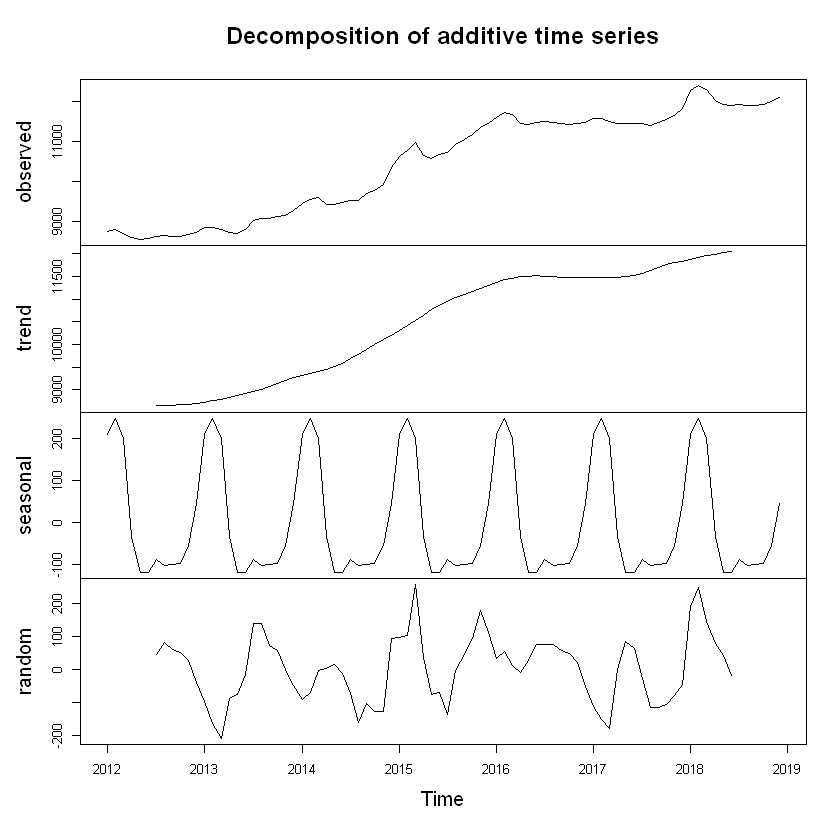

In [11]:
dekomposisi = decompose(hargaberas)
plot(dekomposisi)

#### 2.1.1.1 ACF PACF, Pemilihan Model Tentatif

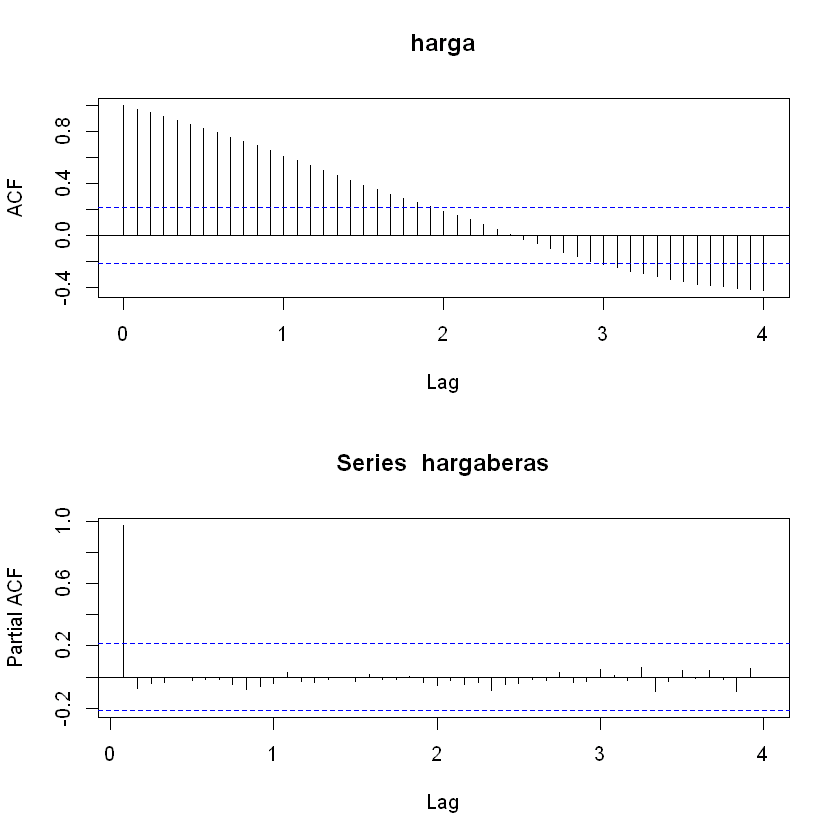

In [12]:
# Plot ACF PACF
par(mfrow = c(2,1))
acf(hargaberas, lag=48)
pacf(hargaberas, lag=48)

#### 2.1.1.2 Uji Stationeritas

In [13]:
# install.packages("aTSA")
library(aTSA)
adf.test(hargaberas)


Attaching package: 'aTSA'


The following object is masked from 'package:graphics':

    identify




Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag  ADF p.value
[1,]   0 2.96   0.990
[2,]   1 1.65   0.975
[3,]   2 2.04   0.990
[4,]   3 2.18   0.990
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -0.537   0.858
[2,]   1 -0.717   0.795
[3,]   2 -0.831   0.755
[4,]   3 -0.917   0.724
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -1.42   0.814
[2,]   1 -2.56   0.340
[3,]   2 -2.00   0.570
[4,]   3 -1.78   0.663
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


In [14]:
adf.test(diff(hargaberas))

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag   ADF p.value
[1,]   0 -5.11    0.01
[2,]   1 -5.02    0.01
[3,]   2 -4.42    0.01
[4,]   3 -4.36    0.01
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -5.47    0.01
[2,]   1 -5.58    0.01
[3,]   2 -5.10    0.01
[4,]   3 -5.27    0.01
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -5.43    0.01
[2,]   1 -5.55    0.01
[3,]   2 -5.10    0.01
[4,]   3 -5.28    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


### 2.1.2 Estimasi Model

In [15]:
# install.packages("forecast")
library(forecast)
auto.arima(hargaberas, trace=TRUE)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'forecast'


The following object is masked from 'package:aTSA':

    forecast





 ARIMA(2,1,2)(1,1,1)[12]                    : Inf
 ARIMA(0,1,0)(0,1,0)[12]                    : 884.0934
 ARIMA(1,1,0)(1,1,0)[12]                    : 872.3993
 ARIMA(0,1,1)(0,1,1)[12]                    : Inf
 ARIMA(1,1,0)(0,1,0)[12]                    : 876.5573
 ARIMA(1,1,0)(2,1,0)[12]                    : 863.6643
 ARIMA(1,1,0)(2,1,1)[12]                    : Inf
 ARIMA(1,1,0)(1,1,1)[12]                    : Inf
 ARIMA(0,1,0)(2,1,0)[12]                    : 867.3178
 ARIMA(2,1,0)(2,1,0)[12]                    : 865.871
 ARIMA(1,1,1)(2,1,0)[12]                    : 865.1084
 ARIMA(0,1,1)(2,1,0)[12]                    : 862.9856
 ARIMA(0,1,1)(1,1,0)[12]                    : 871.9363
 ARIMA(0,1,1)(2,1,1)[12]                    : Inf
 ARIMA(0,1,1)(1,1,1)[12]                    : Inf
 ARIMA(0,1,2)(2,1,0)[12]                    : 861.8543
 ARIMA(0,1,2)(1,1,0)[12]                    : 872.2305
 ARIMA(0,1,2)(2,1,1)[12]                    : Inf
 ARIMA(0,1,2)(1,1,1)[12]                    :

Series: hargaberas 
ARIMA(0,1,3)(2,1,0)[12] 

Coefficients:
         ma1     ma2     ma3     sar1     sar2
      0.3775  0.0028  0.4180  -0.4831  -0.4956
s.e.  0.1166  0.1301  0.1403   0.1231   0.1239

sigma^2 = 7757:  log likelihood = -420.75
AIC=853.49   AICc=854.8   BIC=867.07

In [16]:
# install.packages("lmtest")
library(lmtest)
model1 = arima(hargaberas, order=c(0,1,3), seasonal = list(order=c(2,1,0), period=12)) # Model ARIMA manual
coeftest(model1)


z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
ma1   0.377526   0.116627  3.2370  0.001208 ** 
ma2   0.002799   0.130115  0.0215  0.982837    
ma3   0.417985   0.140264  2.9800  0.002883 ** 
sar1 -0.483126   0.123055 -3.9261 8.634e-05 ***
sar2 -0.495630   0.123883 -4.0008 6.313e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


### 2.1.3 Evaluasi Model

#### 2.1.3.1 Uji Heteroskedastisitas

cukup ARIMA atau perlu dilanjutkan hingga model ARCH GARCH

ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order    PQ p.value
[1,]     4  5.41   0.247
[2,]     8  8.53   0.384
[3,]    12 11.36   0.498
[4,]    16 13.03   0.670
[5,]    20 14.44   0.808
[6,]    24 16.04   0.887
Lagrange-Multiplier test: 
     order    LM  p.value
[1,]     4 41.16 6.04e-09
[2,]     8 13.84 5.42e-02
[3,]    12  6.06 8.69e-01
[4,]    16  3.39 9.99e-01
[5,]    20  2.16 1.00e+00
[6,]    24  1.16 1.00e+00


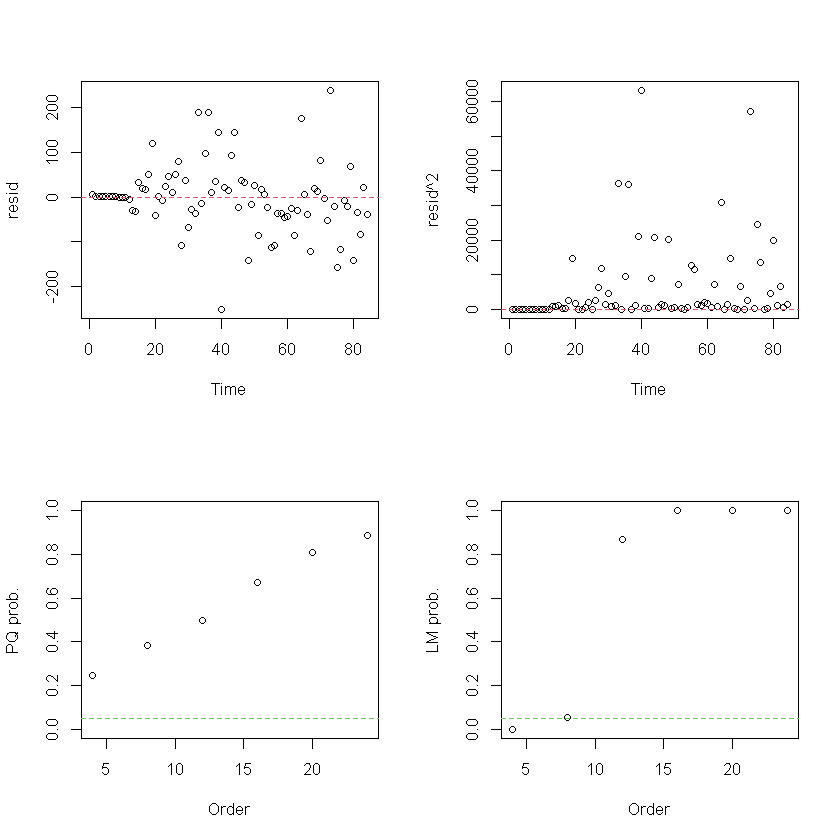

In [17]:
arch.test(model1)

tidak terdapat heteroskedastisitas pada model sehingga telah memenhin asumsi evaluasi model

#### 2.1.3.2 Uji Keacakan Residual

In [18]:
# Diagnostik model (autokorelasi)
Box.test(model1$residuals, lag = 1, type = c("Ljung-Box"), fitdf = 0)


	Box-Ljung test

data:  model1$residuals
X-squared = 0.0041444, df = 1, p-value = 0.9487


0.9487 > 0.05
Tidak cukup bukti bahwa model memiliki autokorelasi

### 2.1.4 Forecast

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2019       12355.67 12246.95 12464.39 12189.39 12521.95
Feb 2019       12493.09 12308.02 12678.16 12210.05 12776.13
Mar 2019       12392.80 12154.53 12631.07 12028.40 12757.21
Apr 2019       12143.41 11835.19 12451.63 11672.03 12614.80
May 2019       12079.80 11714.79 12444.80 11521.57 12638.02
Jun 2019       12086.96 11672.89 12501.04 11453.70 12720.23
Jul 2019       12116.54 11658.63 12574.45 11416.22 12816.85
Aug 2019       12086.48 11588.57 12584.38 11325.00 12847.96
Sep 2019       12072.73 11537.81 12607.64 11254.64 12890.81
Oct 2019       12077.85 11508.32 12647.38 11206.83 12948.88
Nov 2019       12129.83 11527.68 12731.99 11208.92 13050.75
Dec 2019       12188.63 11555.52 12821.73 11220.38 13156.88

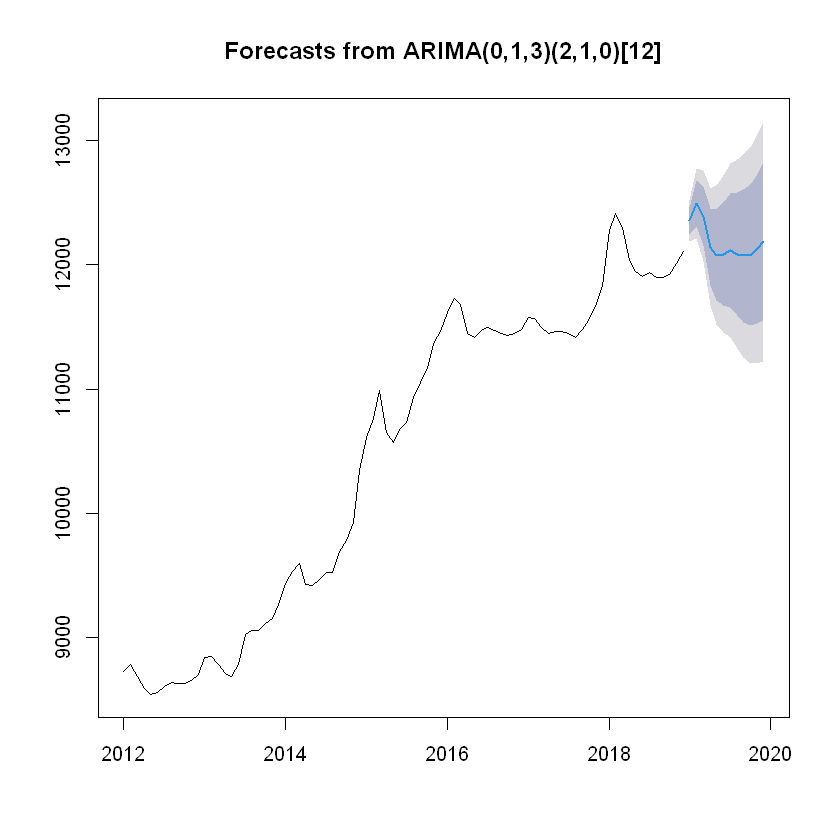

In [20]:
forecast(model1, h=12)
plot(forecast(model1, h=12))

## 2.2 Model ARCH - GARCH

### 2.2.1 Identifikasi Model

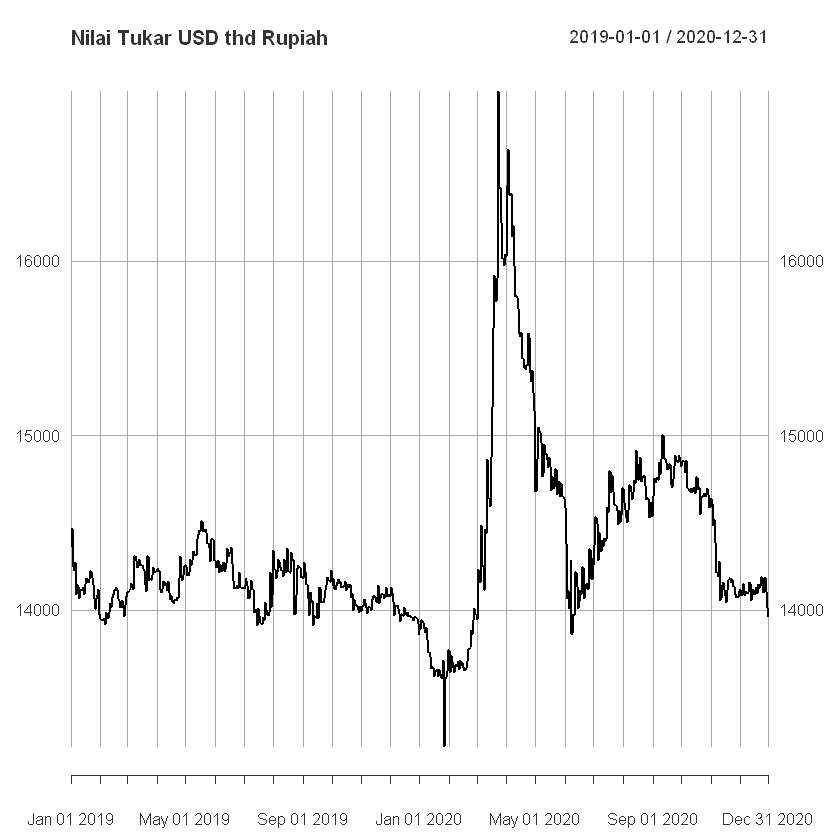

In [25]:
library(readxl)
kurs <- read_excel("D:\\Repositori\\R-tutorial\\data - R IPB\\Bab 3\\ARCH-GARCH.xlsx")
kurs = kurs[,c(-1)]
Dates = seq(as.Date('2019-01-01'), as.Date("2020-12-31"), "day")
library(xts)
kurs = xts(kurs, order.by = Dates)
plot(kurs, main="Nilai Tukar USD thd Rupiah")


### 2.2.2 Estimasi Model

In [26]:
auto.arima(kurs, trace = TRUE)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : 8738.664
 ARIMA(0,1,0) with drift         : 8755.631
 ARIMA(1,1,0) with drift         : 8745.702
 ARIMA(0,1,1) with drift         : 8744.836
 ARIMA(0,1,0)                    : 8753.644
 ARIMA(1,1,2) with drift         : 8742.017
 ARIMA(2,1,1) with drift         : 8748.12
 ARIMA(3,1,2) with drift         : 8746.649
 ARIMA(2,1,3) with drift         : 8740.697
 ARIMA(1,1,1) with drift         : 8746.629
 ARIMA(1,1,3) with drift         : 8743.813
 ARIMA(3,1,1) with drift         : 8748.657
 ARIMA(3,1,3) with drift         : 8751.34
 ARIMA(2,1,2)                    : 8736.651
 ARIMA(1,1,2)                    : 8740.011
 ARIMA(2,1,1)                    : 8746.122
 ARIMA(3,1,2)                    : 8744.611
 ARIMA(2,1,3)                    : 8738.68
 ARIMA(1,1,1)                    : 8744.657
 ARIMA(1,1,3)                    : 8741.802
 ARIMA(3,1,1)                    : 8746.636
 ARIMA(3,1,3)     

Series: kurs 
ARIMA(2,1,2) 

Coefficients:
         ar1      ar2      ma1     ma2
      1.2304  -0.7997  -1.3560  0.8726
s.e.  0.0650   0.0506   0.0599  0.0425

sigma^2 = 9181:  log likelihood = -4364.54
AIC=8739.08   AICc=8739.16   BIC=8762.05

In [28]:
# Simpan model terbaik dengan dengan nama model2 dengan mengestimasi ulang fungsi ARIMA
model2 = arima(kurs, order=c(2,1,2))
coeftest(model2)


z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ar1  1.230421   0.065027  18.922 < 2.2e-16 ***
ar2 -0.799713   0.050577 -15.812 < 2.2e-16 ***
ma1 -1.355960   0.059905 -22.635 < 2.2e-16 ***
ma2  0.872641   0.042457  20.554 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


### 2.2.3 Evaluasi Model - Uji Heteroskedastisitas - ARCH Test

ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order    PQ p.value
[1,]     4  70.7 1.6e-14
[2,]     8 134.2 0.0e+00
[3,]    12 188.4 0.0e+00
[4,]    16 206.3 0.0e+00
[5,]    20 216.8 0.0e+00
[6,]    24 225.0 0.0e+00
Lagrange-Multiplier test: 
     order   LM  p.value
[1,]     4 1471 0.00e+00
[2,]     8  446 0.00e+00
[3,]    12  251 0.00e+00
[4,]    16  179 0.00e+00
[5,]    20  135 0.00e+00
[6,]    24  106 1.14e-12


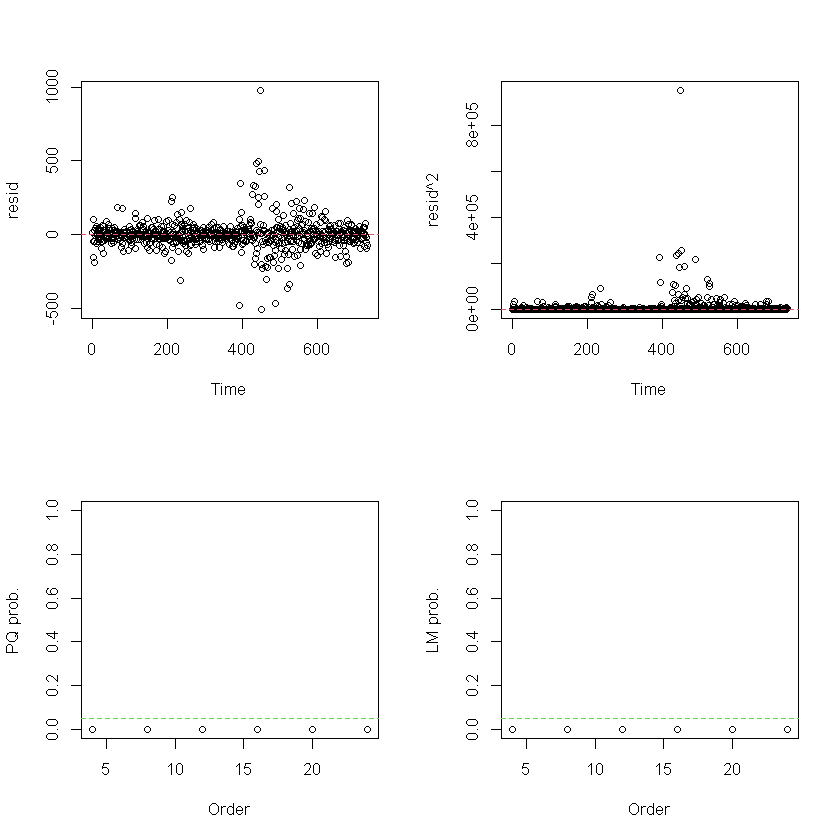

In [29]:
arch.test(model2)

nilai P-value kurang dari 0.05 sehingga H0 ditolak (terdapat masalah heteroskedastisitas) sehingga perlu menggunakan metode ARCH dan GARCH untuk melakukan estimasi

In [31]:
# install.packages("fGarch")
pp.test(kurs)
pp.test(diff(kurs))

Installing package into 'C:/Users/hisbi/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



also installing the dependencies 'rbibutils', 'gss', 'stabledist', 'gbutils', 'Rdpack', 'fBasics', 'timeSeries', 'fastICA', 'cvar'




package 'rbibutils' successfully unpacked and MD5 sums checked
package 'gss' successfully unpacked and MD5 sums checked
package 'stabledist' successfully unpacked and MD5 sums checked
package 'gbutils' successfully unpacked and MD5 sums checked
package 'Rdpack' successfully unpacked and MD5 sums checked
package 'fBasics' successfully unpacked and MD5 sums checked
package 'timeSeries' successfully unpacked and MD5 sums checked
package 'fastICA' successfully unpacked and MD5 sums checked
package 'cvar' successfully unpacked and MD5 sums checked
package 'fGarch' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hisbi\AppData\Local\Temp\Rtmp8WzPnY\downloaded_packages


Hasil uji stasioner menunjukkan bahwa data kurs stasioner pada bentuk first difference.
Transformasi first difference menyebabkan baris pertama menjadi missing value

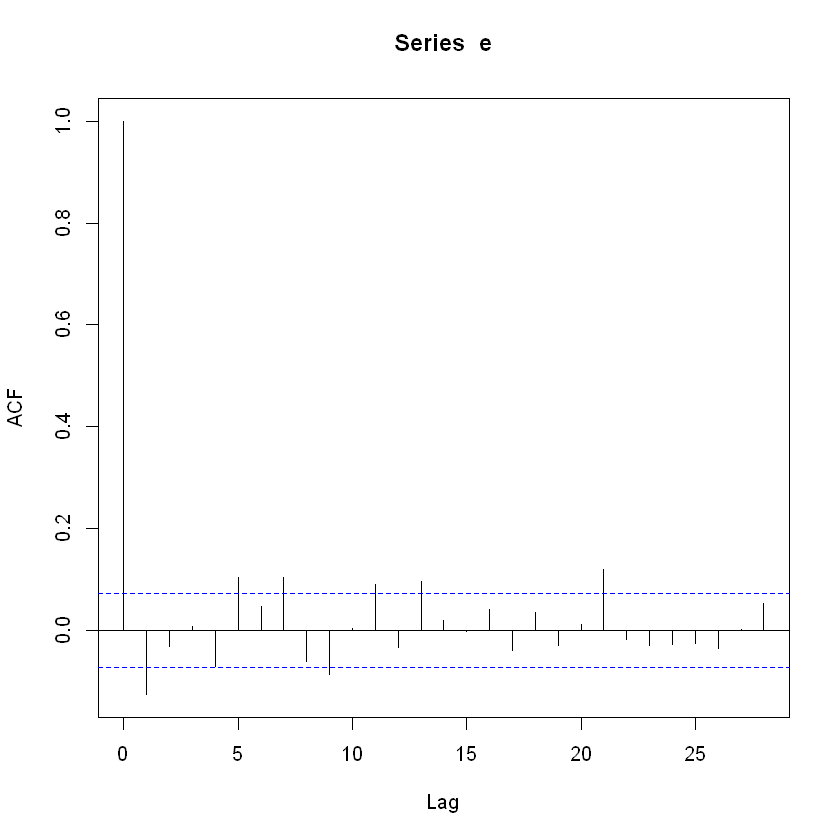

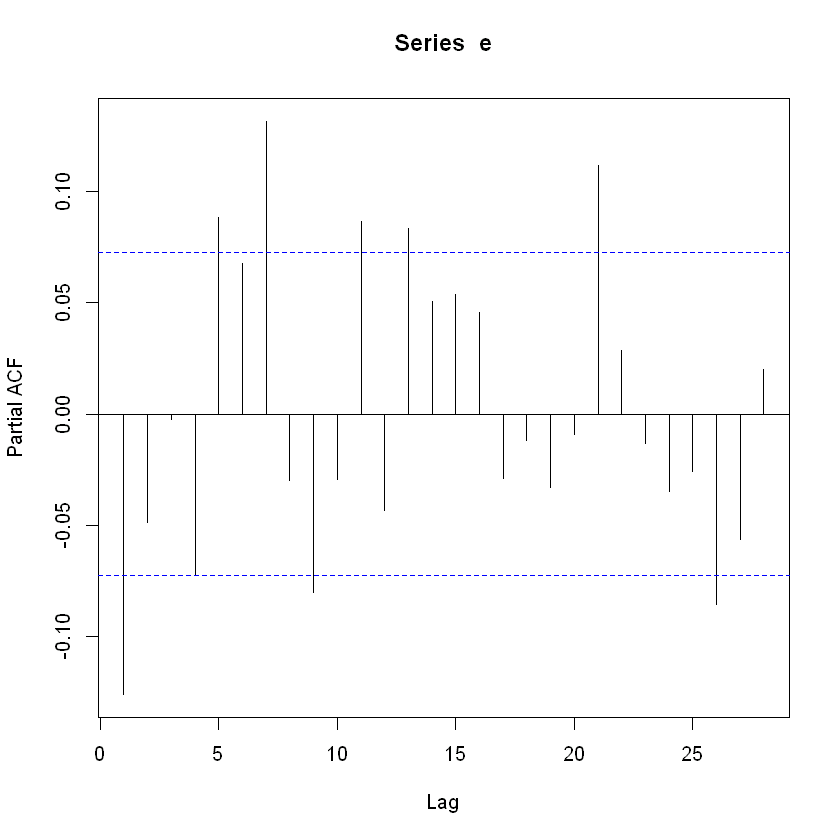

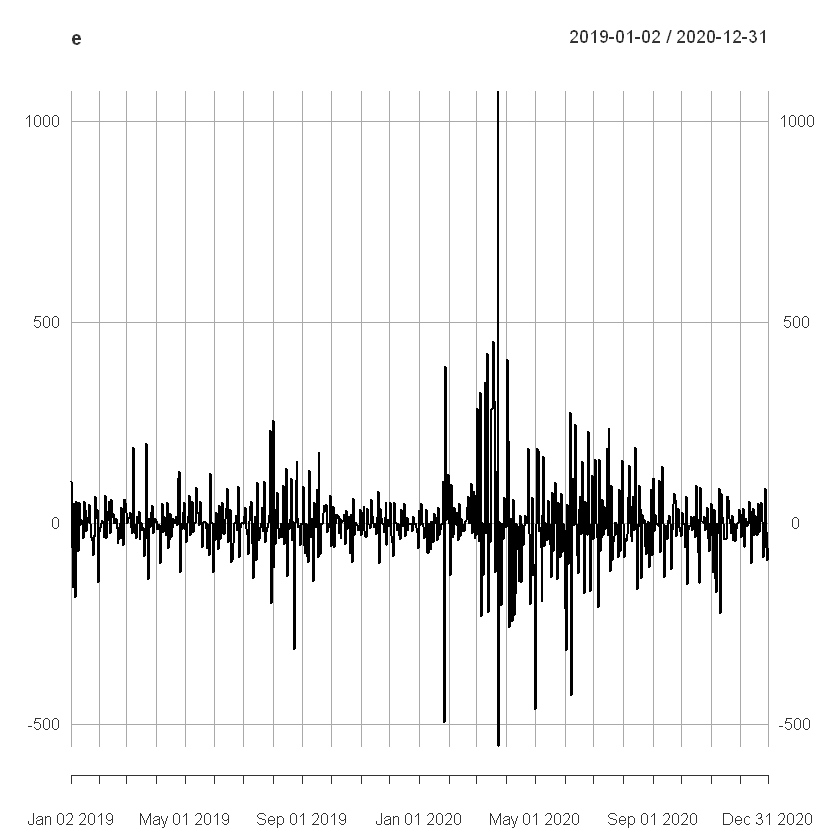

In [33]:
e = diff(kurs)[-1]
par(mfrow = c(1,1))
acf(e)
pacf(e)
plot(e)

data kurs terlihat memiliki fluktuasi yang cukup tinggi pada maret hingga april 2020. Hal tersebut dapat dilihat dari simpangan baku yang cukup tinggi

In [34]:
library(fGarch)
# ARCH(1) = GARCH(1,0)
model10 = garchFit(~garch(1,0), data=e, trace = FALSE)
summary(model10)

NOTE: Packages 'fBasics', 'timeDate', and 'timeSeries' are no longer
attached to the search() path when 'fGarch' is attached.

If needed attach them yourself in your R script by e.g.,
        require("timeSeries")




Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 0), data = e, trace = FALSE) 

Mean and Variance Equation:
 data ~ garch(1, 0)
<environment: 0x00000237dff340a0>
 [data = e]

Conditional Distribution:
 norm 

Coefficient(s):
        mu       omega      alpha1  
  -1.15887  5442.67260     0.61303  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu       -1.1589      2.8293   -0.410    0.682    
omega  5442.6726    374.5058   14.533  < 2e-16 ***
alpha1    0.6130      0.1073    5.713 1.11e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -4303.768    normalized:  -5.895573 

Description:
 Sat Oct 12 19:39:22 2024 by user: hisbi 


Standardised Residuals Tests:
                                  Statistic      p-Value
 Jarque-Bera Test   R    Chi^2  4839.704460 0.000000e+00
 Shapiro-Wilk Test  R    W         0.839958 0.000000e+00
 Ljung-Box Test     R    Q(10)    29.630084 9.844469

In [35]:
library(fGarch)
# ARCH(1) = GARCH(1,0)
model11 = garchFit(~garch(1,1), data=e, trace = FALSE)
summary(model10)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 0), data = e, trace = FALSE) 

Mean and Variance Equation:
 data ~ garch(1, 0)
<environment: 0x00000237dff340a0>
 [data = e]

Conditional Distribution:
 norm 

Coefficient(s):
        mu       omega      alpha1  
  -1.15887  5442.67260     0.61303  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu       -1.1589      2.8293   -0.410    0.682    
omega  5442.6726    374.5058   14.533  < 2e-16 ***
alpha1    0.6130      0.1073    5.713 1.11e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -4303.768    normalized:  -5.895573 

Description:
 Sat Oct 12 19:39:22 2024 by user: hisbi 


Standardised Residuals Tests:
                                  Statistic      p-Value
 Jarque-Bera Test   R    Chi^2  4839.704460 0.000000e+00
 Shapiro-Wilk Test  R    W         0.839958 0.000000e+00
 Ljung-Box Test     R    Q(10)    29.630084 9.844469

In [40]:
library(fGarch)
# ARCH(1) = GARCH(1,0)
model11b = garchFit(~arma(0,1)+garch(1,1), data=e, trace = FALSE)
summary(model11b)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(0, 1) + garch(1, 1), data = e, trace = FALSE) 

Mean and Variance Equation:
 data ~ arma(0, 1) + garch(1, 1)
<environment: 0x00000237da4a35b8>
 [data = e]

Conditional Distribution:
 norm 

Coefficient(s):
       mu        ma1      omega     alpha1      beta1  
 -2.53982   -0.22537  337.43876    0.23716    0.75465  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu      -2.53982     1.74379   -1.456    0.145    
ma1     -0.22537     0.04724   -4.771 1.83e-06 ***
omega  337.43876    85.21204    3.960 7.50e-05 ***
alpha1   0.23716     0.04038    5.874 4.26e-09 ***
beta1    0.75465     0.03129   24.118  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -4177.446    normalized:  -5.722529 

Description:
 Sat Oct 12 19:45:36 2024 by user: hisbi 


Standardised Residuals Tests:
                                   Statistic    p-Value
 

Perbandingan 3 model tentatif yang telah dilakukan menunjukkan karena memiliki AIC terkecil dan nilai LM Arch Test lebih dari 0.05 sehingga tidak tolak H0 (tidak terdapat masalah heteroskedastisitas)

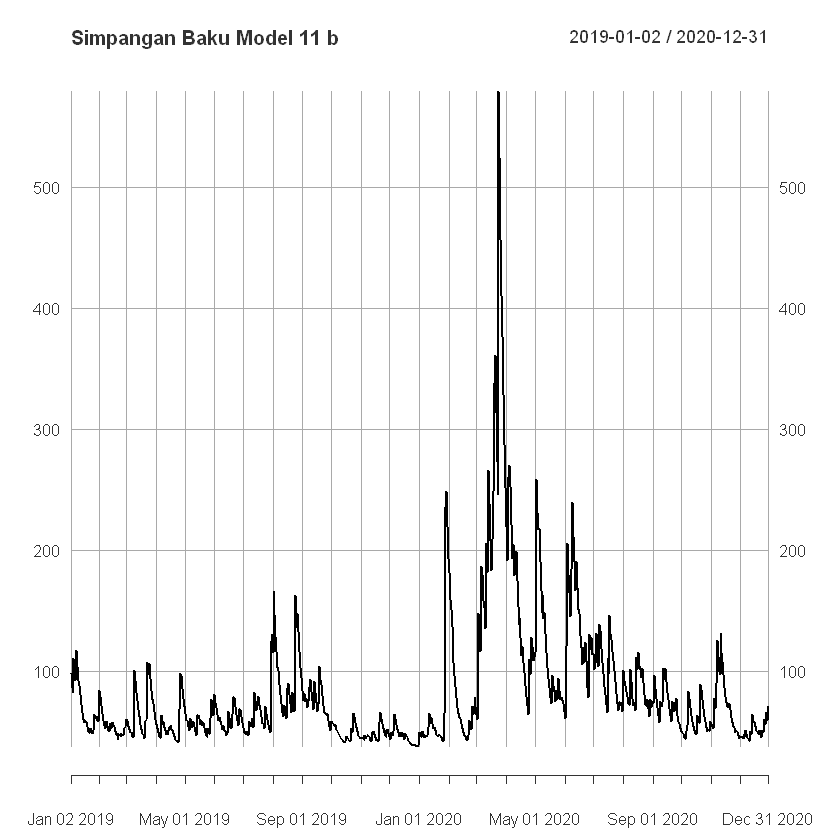

In [51]:
# Plot simpangan baku
Dates2 = seq(as.Date("2019-01-02"),as.Date("2020-12-31"), "day")
stdev = xts(model11b@sigma.t, order.by = Dates2)
plot(stdev, main = "Simpangan Baku Model 11 b")

Hasil simpangan baku menunjukkan bulan Maret - Mei 2020 terjadi fluktuasi/volatilitas kurs yang cukup tinggi

### 2.2.4 Peramalan Volatilitas

meanForecast,meanError,standardDeviation,lowerInterval,upperInterval
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15.748251,76.11087,76.11087,-133.4263,164.9228
-2.539819,79.85676,77.99279,-159.0562,153.9765
-2.539819,81.72802,79.81549,-162.7238,157.6442
-2.539819,83.54257,81.58306,-166.2802,161.2006
-2.539819,85.30415,83.29911,-169.7329,164.6532
-2.539819,87.01608,84.96689,-173.0882,168.0086
-2.539819,88.68137,86.58929,-176.3521,171.2725
-2.539819,90.30269,88.16892,-179.5298,174.4502
-2.539819,91.88248,89.70815,-182.6262,177.5465


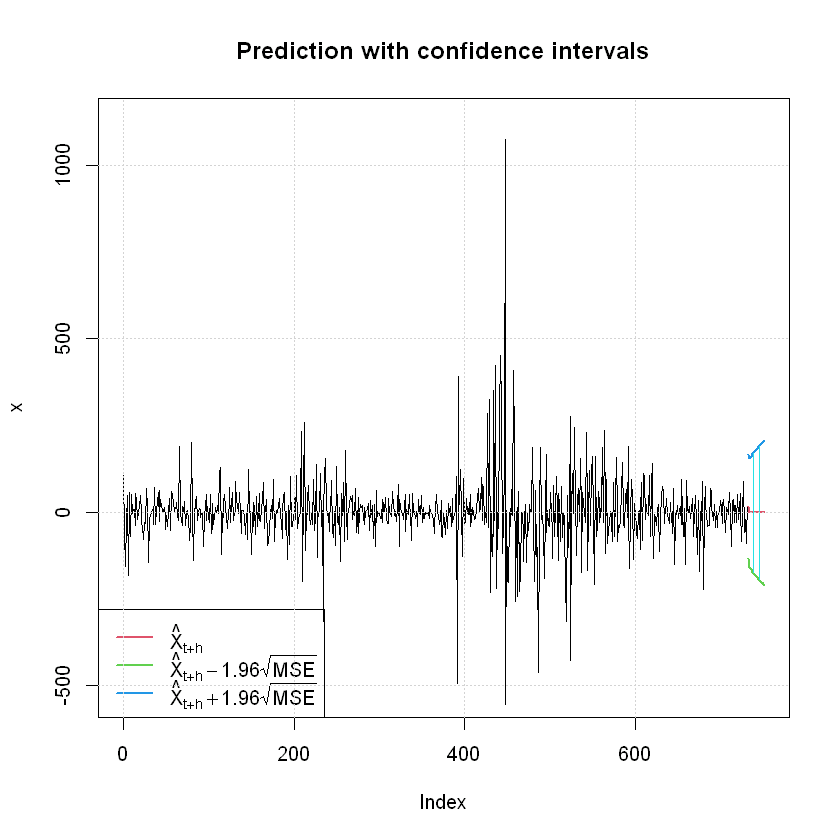

In [53]:
predict(model11b, n.ahead=20, plot=TRUE, nx=731)